In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = 'C:/Users/gayathri.katta/Desktop/lung disease project/dataset/train'
test_dir='C:/Users/gayathri.katta/Desktop/lung disease project/dataset/test'

In [ ]:
batch_size = 1
epochs = 15
img_height = 180
img_width = 180

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 771 images belonging to 4 classes.


In [ ]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 304 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50, VGG19, MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

# Input shape is optional, but you can specify it if needed
input_shape = (224, 224, 3)
input_tensor = Input(shape=input_shape)

# Create MobileNetV2 model
mobilenetv2_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Optionally, add your own layers on top of MobileNetV2
# ...

# Display a summary of the MobileNetV2 model
mobilenetv2_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
mobilenetv2_model.trainable = False

In [ ]:
mobilenetv2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
classifier=tf.keras.models.Sequential()
classifier.add(mobilenetv2_model)
classifier.add(Flatten())
classifier.add(Dense(4,activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 250884    
                                                                 
Total params: 2508868 (9.57 MB)
Trainable params: 250884 (980.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Display the output shape of MobileNetV2
mobilenetv2_model.output_shape


(None, 7, 7, 1280)

In [ ]:
# Display the input shape expected by Flatten layer
classifier.layers[1].input_shape


(None, 7, 7, 1280)

In [ ]:
# Add Flatten layer with specified input shape
classifier.add(Flatten(input_shape=mobilenetv2_model.output_shape[1:]))


In [ ]:
classifier = tf.keras.models.Sequential()

# Add MobileNetV2 model as a layer
classifier.add(mobilenetv2_model)

# Add Global Average Pooling layer
classifier.add(tf.keras.layers.GlobalAveragePooling2D())

# Add Dense layer with 4 units and softmax activation for classification
classifier.add(Dense(4, activation='softmax'))

# Display the summary of the classifier model
classifier.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2263108 (8.63 MB)
Trainable params: 5124 (20.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Flatten, Dense

# Define your input shape
input_shape = (180,180,3)

# Create an input tensor with the specified shape
input_tensor = Input(shape=input_shape)

# Load MobileNetV2 with the new input shape
mobilenetv2_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Define the rest of your model
classifier = tf.keras.models.Sequential()
classifier.add(mobilenetv2_model)
classifier.add(Flatten())
classifier.add(Dense(4, activation='softmax'))

# Compile the model
classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Now you can proceed with training
epochs = 3
history = classifier.fit(train_data_gen,
                          epochs=epochs,
                          validation_data=val_data_gen)


Epoch 1/3
771/771 [==============================] - 137s 149ms/step - loss: 4.1028 - accuracy: 0.4488 - val_loss: 5.3335 - val_accuracy: 0.4539
Epoch 2/3
771/771 [==============================] - 117s 151ms/step - loss: 1.9902 - accuracy: 0.6368 - val_loss: 4.7477 - val_accuracy: 0.5197
Epoch 3/3
771/771 [==============================] - 114s 148ms/step - loss: 1.6427 - accuracy: 0.7185 - val_loss: 12.4361 - val_accuracy: 0.4178


In [ ]:
classifier.save('lung_mobile_netv2.h5')

C:\Users\gayathri.katta\AppData\Local\miniconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#pip install Pillow

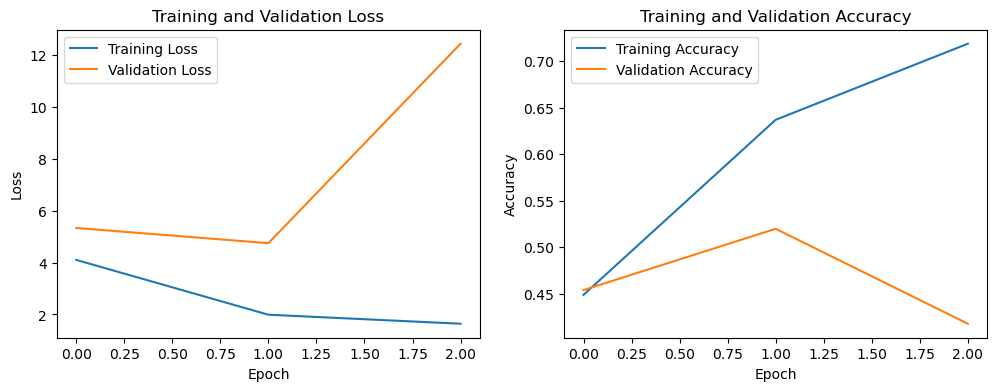

In [ ]:
import matplotlib.pyplot as plt

# Access training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


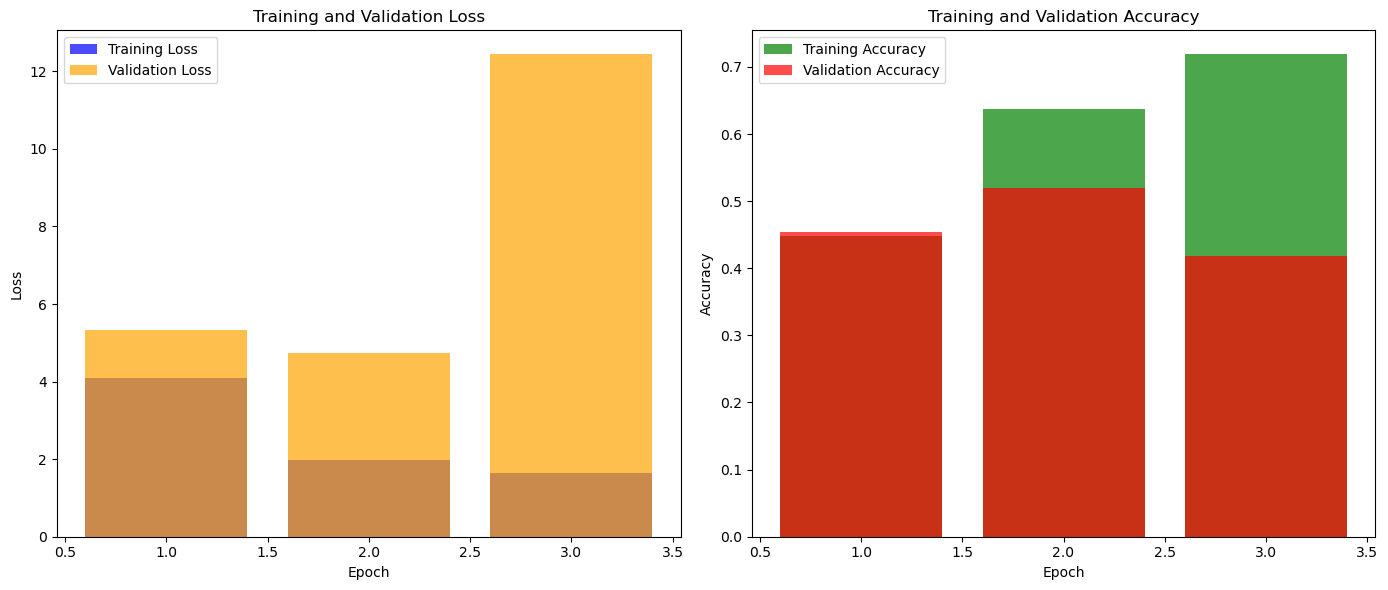

In [ ]:
import matplotlib.pyplot as plt

# Access training history
epochs = range(1, len(history.history['accuracy']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training history as bar graphs
plt.figure(figsize=(14, 6))

# Training and Validation Loss
plt.subplot(1, 2, 1)
plt.bar(epochs, training_loss, label='Training Loss', color='blue', alpha=0.7)
plt.bar(epochs, validation_loss, label='Validation Loss', color='orange', alpha=0.7)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.bar(epochs, training_accuracy, label='Training Accuracy', color='green', alpha=0.7)
plt.bar(epochs, validation_accuracy, label='Validation Accuracy', color='red', alpha=0.7)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

In [ ]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= classifier.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

304/304 - 15s - 15s/epoch - 49ms/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=85)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [ ]:
cm_plot_labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

Confusion matrix, without normalization
[[28 37 20 11]
 [ 9 65  4 18]
 [11 12 34  7]
 [24  4 20  0]]
Accuracy: 0.418
Precision: 0.505
Recall: 0.418
F-Measure: 0.418


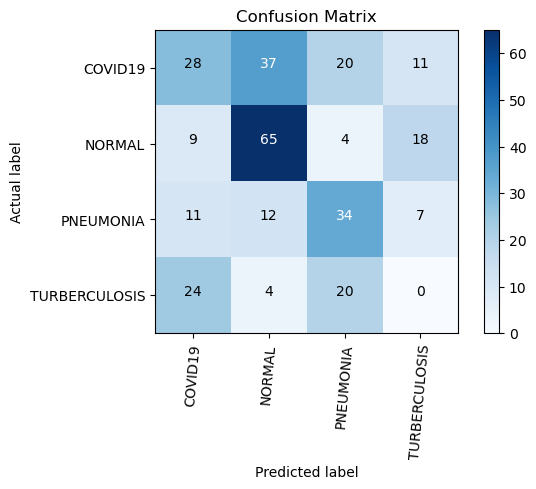

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((224,224))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = classifier.predict_classes(X_test)
    return image,Y_pred